In [1]:
import numpy as np
import os,sys



sys.path.append('../../../RL_lib/Agents/PPO')
sys.path.append('../../../RL_lib/Utils')
sys.path.append('../..')
%load_ext autoreload
%load_ext autoreload
%autoreload 2
%matplotlib nbagg
import os
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/briangaudet/Study/Subjects/MachineLearning/Projects/AAS_TEST/RUN/AAS_18-290_3dof_manuscript/Run/Run_4km


In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

3-dof dynamics model
lander model apf
dvec vc 3
queue fixed
Flat Constraint


<IPython.core.display.Javascript object>


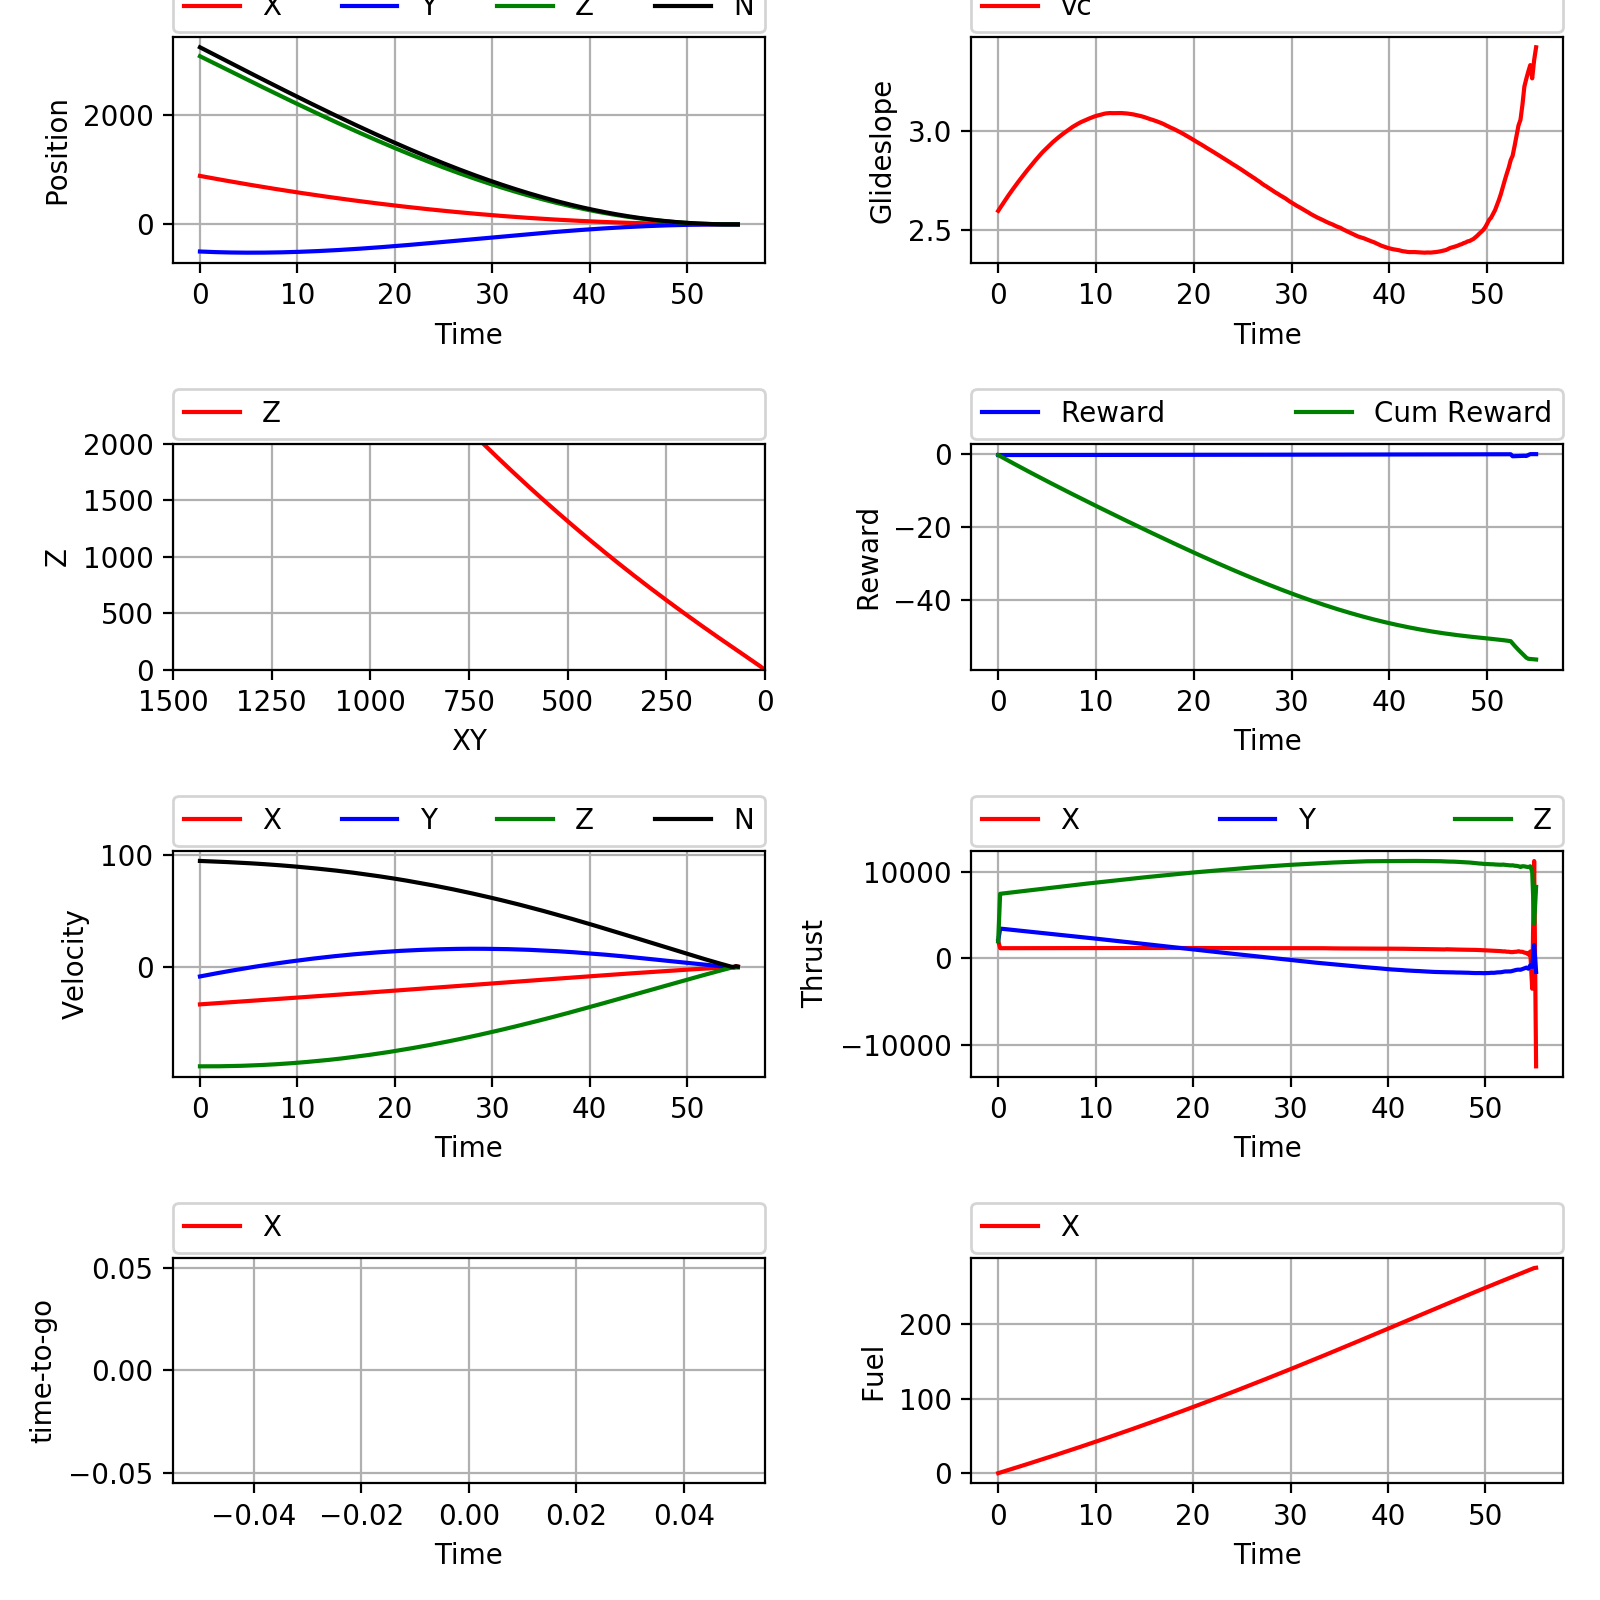

<IPython.core.display.Javascript object>


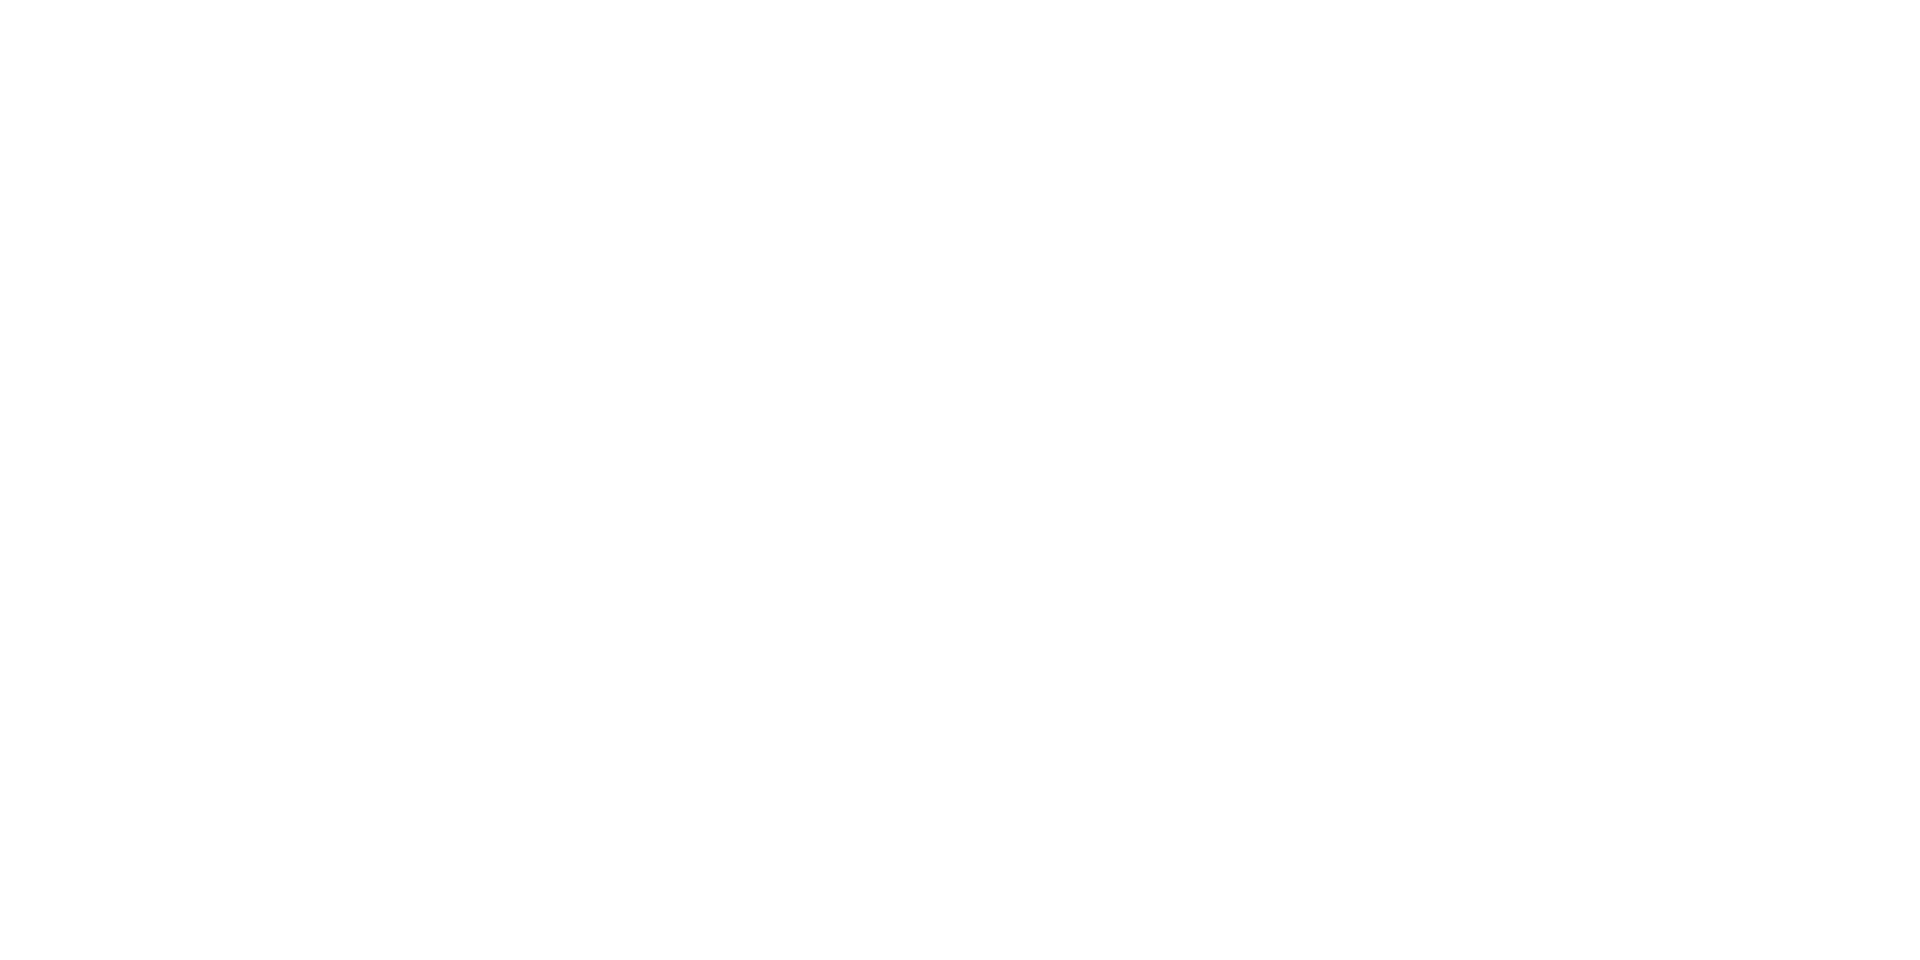

<IPython.core.display.Javascript object>


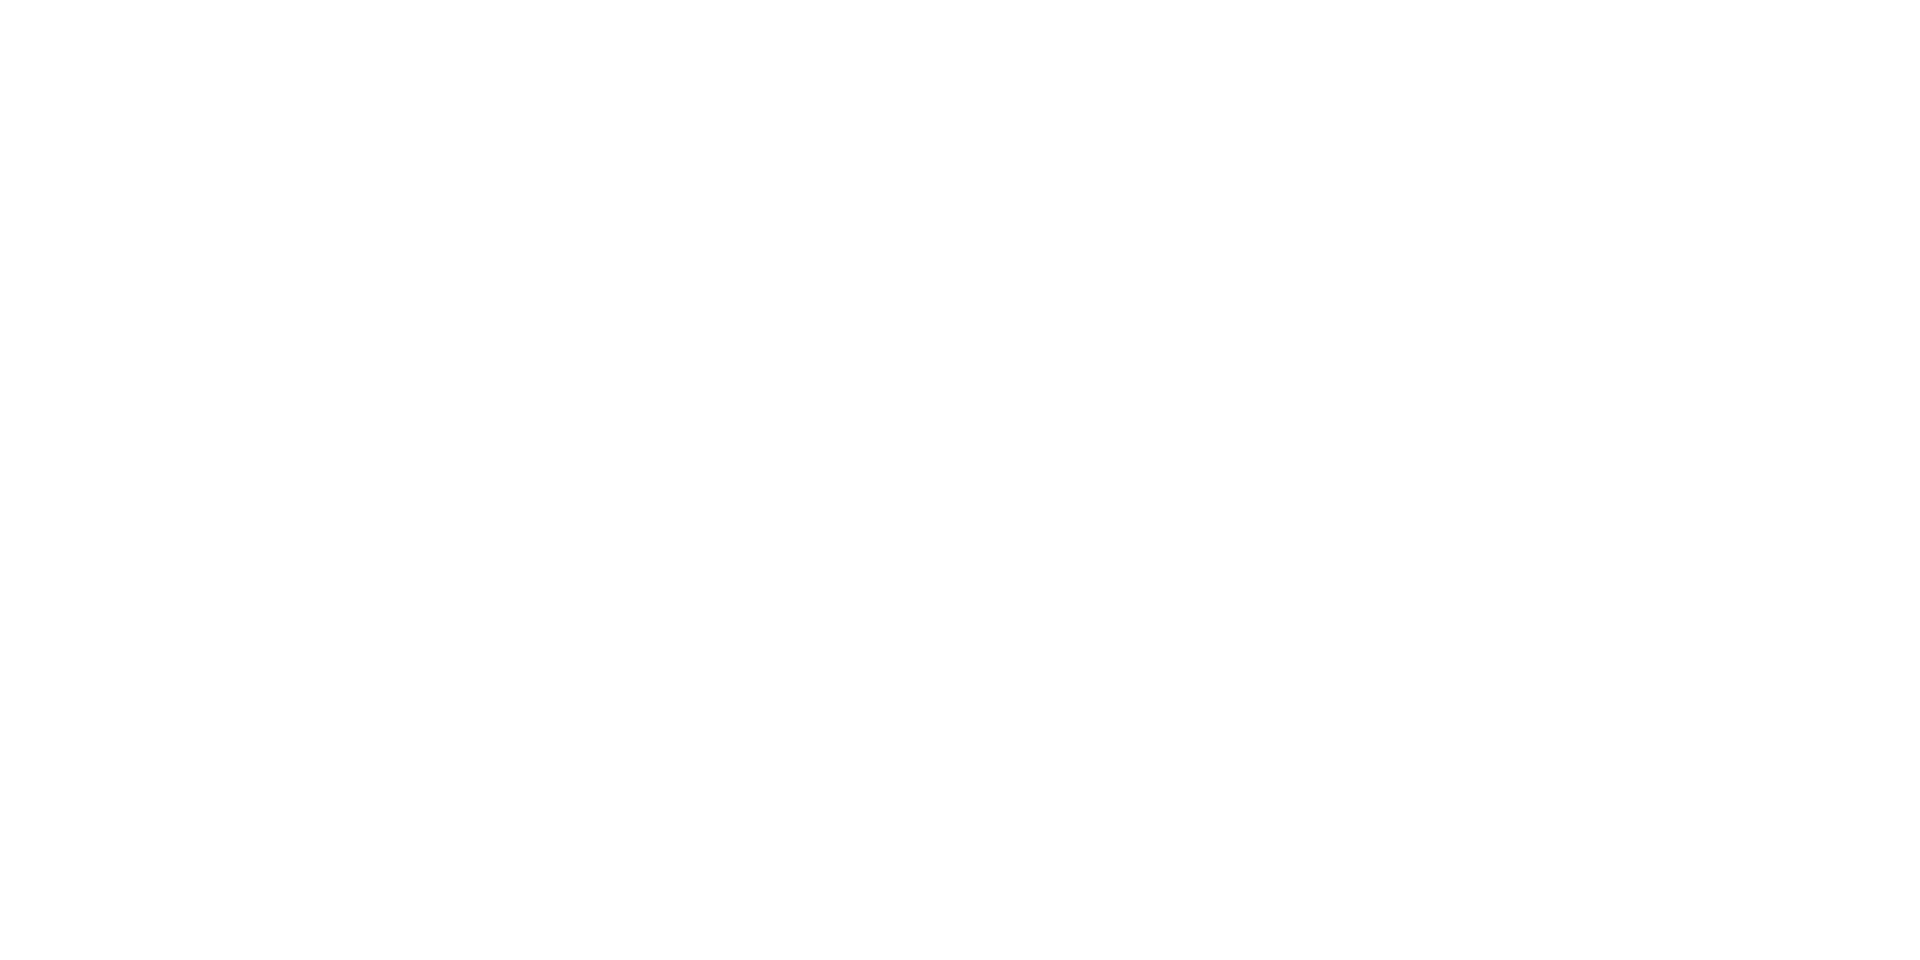

<IPython.core.display.Javascript object>


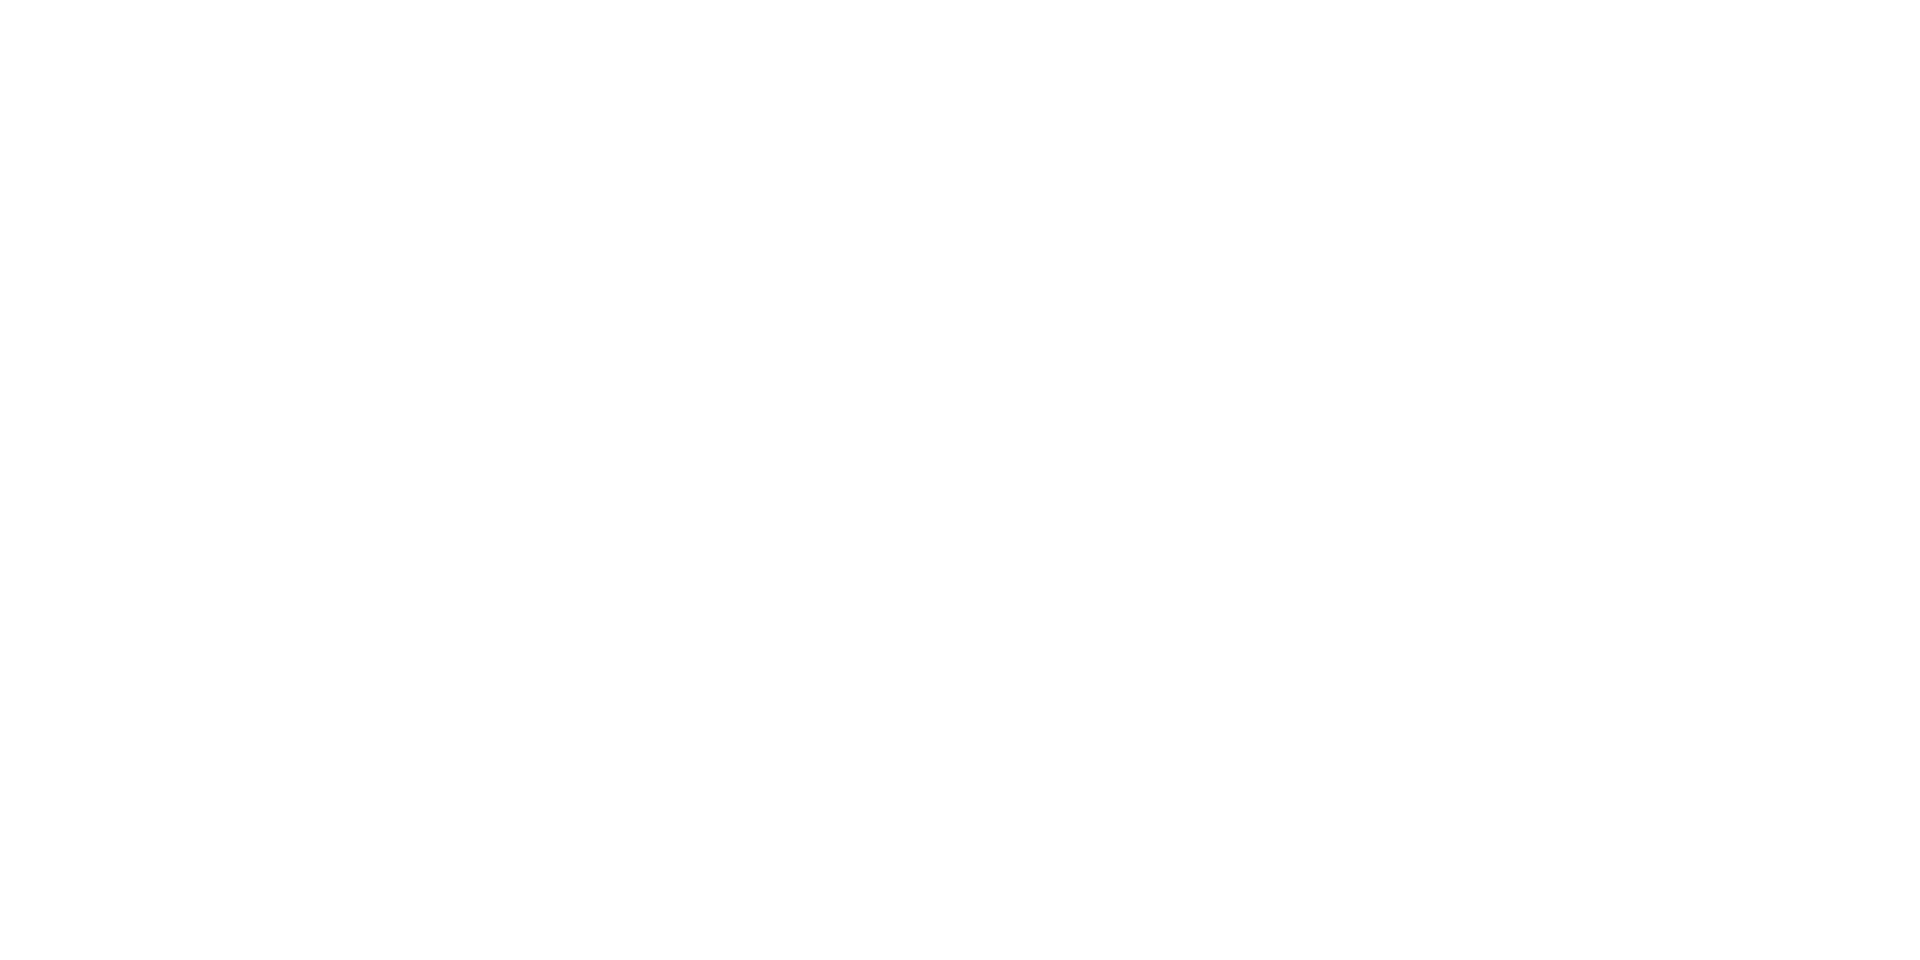

<IPython.core.display.Javascript object>


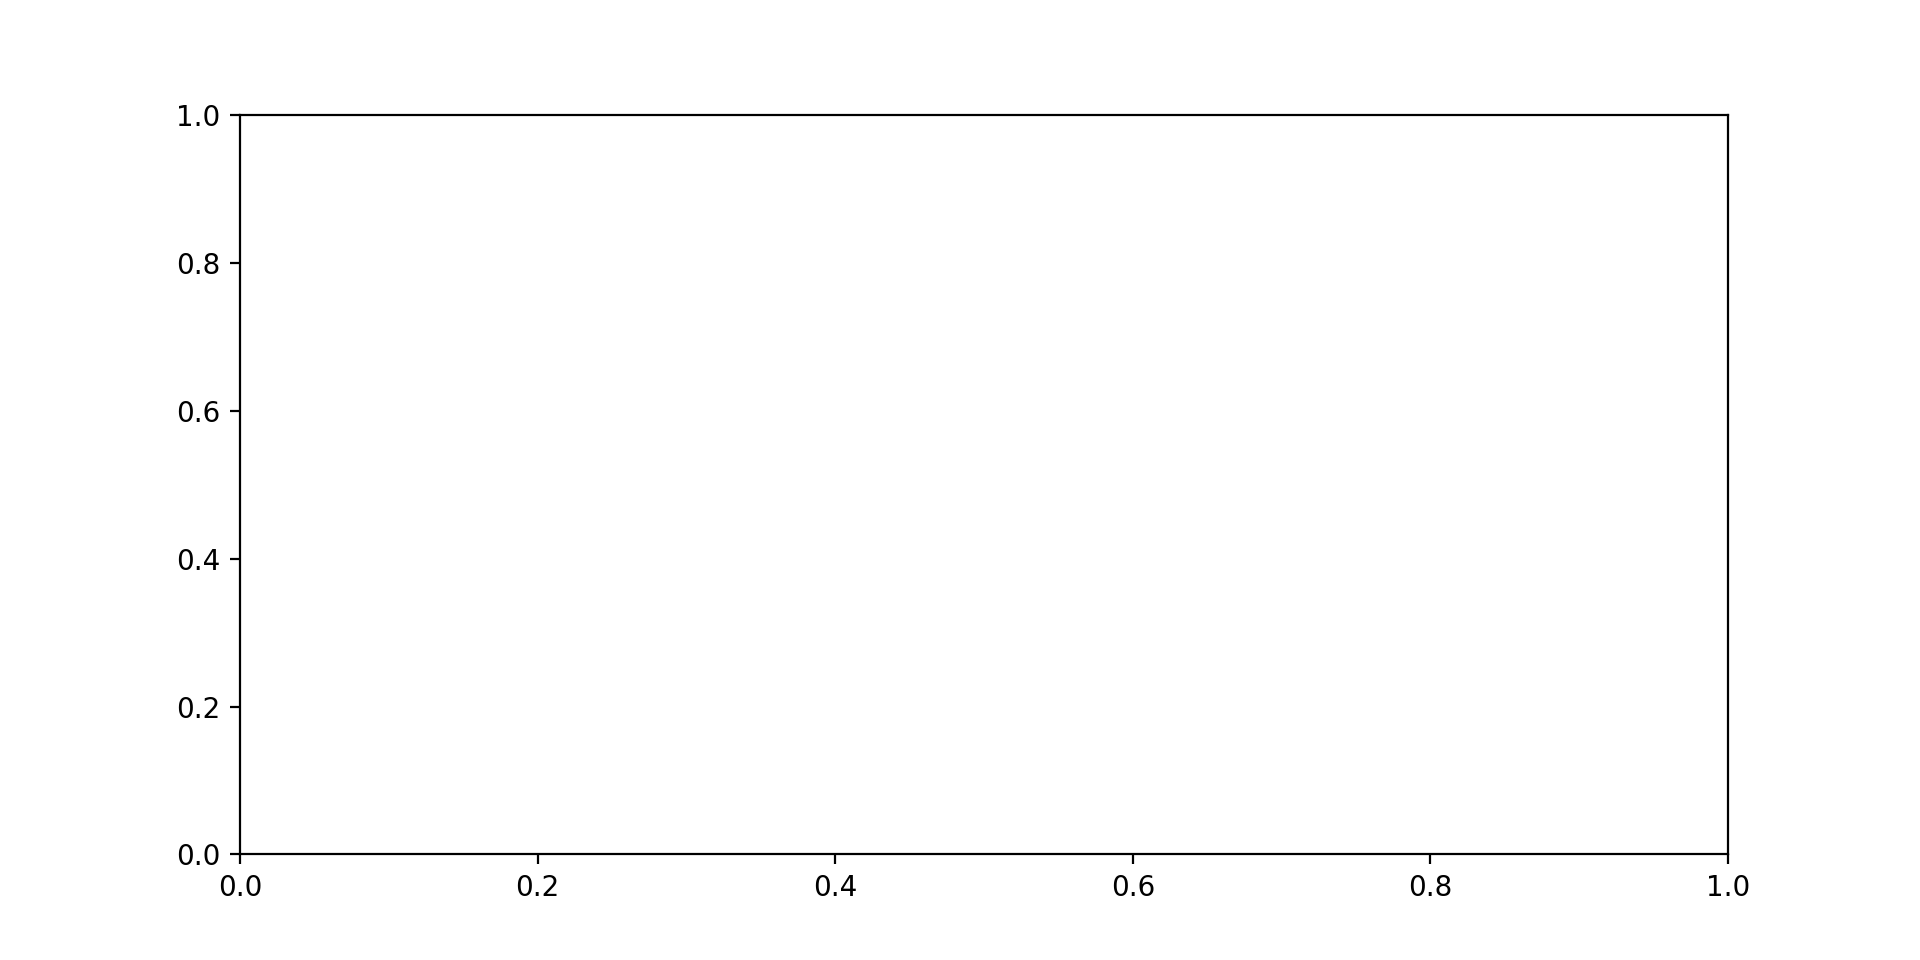

lander env new
Landing_icgen:
    downrange                   :  (0, 4000, -70, -10)
    crossrange                  :  (-1500, 1500, -30, 30)
    altitude                    :  (2900, 3100, -90, -70)
    adjust_apf_v0               :  True
276 0.05227091274804805 0.5538402586100818


In [3]:
from env import Env
from dynamics_model import Dynamics_model
from reward import Reward
from lander_model import Lander_model
from flat_constraint import Flat_constraint

from glideslope_constraint import Glideslope_constraint
from ic_gen import Landing_icgen


from drdv_agent import DRDV_agent
from utils import Mapminmax,Logger

logger = Logger()

dynamics_model = Dynamics_model(h=0.05)

lander_model = Lander_model(use_trajectory_list=True)
lander_model.get_state_agent = lander_model.get_state_agent8
#lander_model.max_thrust=55000
reward_object = Reward()
glideslope_constraint = Glideslope_constraint(gs_limit=0.0)
#shape_constraint = Parabaloid_constraint(altitude=500,debug=False)
shape_constraint = Flat_constraint()
env = Env(lander_model,dynamics_model,logger,
          reward_object=reward_object,
          glideslope_constraint=glideslope_constraint,
          shape_constraint=shape_constraint,
          tf_limit=200.0,print_every=10,
          scale_agent_action=False)


env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.0,0.0),noise_u=100,noise_sd=100, #u=1000 breaks
                          downrange = (0,4000 , -70, -10), 
                           crossrange = (-1500,1500 , -30,30),  
                           altitude = (2900,3100,-90,-70))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()


In [4]:

pos,vel,traj=agent.test_batch(n=5000)

298 0.028162718422206783 0.714235285780492
267 0.004255879450384626 0.19723642459596227
324 0.010201068675149777 0.14725426481038378
295 0.011525639755224559 0.352942089423421
273 0.011870376413565187 0.20983958178576687
283 0.01433575610209232 0.33212526285279204
286 0.057862425731846426 0.5672273234045169
283 0.0035369647560928247 0.0643717638107871
293 0.005241399734983891 0.1657435507361341
368 0.05128501767820843 1.0746316713894313
370 0.057541861312196456 1.0434504766445603
389 0.004456138217557649 0.08606088229053536
260 0.004391167557152017 0.15393899046571494
359 0.029893941032048288 0.40682540967933556
285 0.010849746244042153 0.6061285968506496
335 0.025687645100292103 0.4641197296337204
325 0.02007389112132564 0.345084743034995
310 0.004682115343569158 0.07259664925194884
368 0.03703067869828303 0.8045887299545723
278 0.018894189249224168 0.9066069303049633
400 0.005215418918069703 0.4111926045894364
336 0.005318058267068066 0.12171452200319109
410 0.09267291454417774 0.189

297 0.005285803076329836 0.36433226289264964
388 0.023948696295575146 0.1288512788762179
262 0.007816558539914455 0.11342746415810864
389 0.04686073413655272 0.8004652145109531
373 0.01264423517393802 0.3312321038145304
368 0.0010559090913855524 0.13507991206055525
318 0.012182852156980398 0.21602934135078777
301 0.02262123901894761 0.8881656795269893
295 0.009380230141263287 0.2587501123971154
284 0.01314592951761723 0.16473617823181608
270 0.020363371251778124 0.42400260002870394
285 0.020872392569680476 0.5103952585914624
351 0.008889351559384655 0.24020363813388196
280 0.005464308097637793 0.0743561050948403
270 0.005681083449521779 0.10540272253463985
329 0.002688659605457192 0.3731816747187614
334 0.015478112205212101 0.27026710226221645
321 0.017649016478460317 0.24694006139479183
354 0.05379574248624706 0.1564656249376448
361 0.00915995144995704 0.13290820259525293
365 0.0022202692881735436 0.018532548705223483
339 0.014929434544175684 0.5122168369202821
315 0.01681171672691336

288 0.06487008616518906 0.5529552063041783
375 0.015496818870155466 0.39513342110575334
362 0.01889565172961335 0.3777904410679968
267 0.044371104644245714 0.5404782746989134
327 0.0067138429481222416 0.4507186241791491
297 0.014679036891843448 0.25496138117644823
291 0.007477676230394258 0.11229316737473757
342 0.02819536098055887 0.2961020057528429
364 0.027820904560914735 0.7812049260864432
303 0.051037994825994165 1.075725256756817
304 0.008466470540798045 0.17634979953937677
293 0.008051683093030941 0.12924405183047025
291 0.0028667737292315675 0.16227469592309385
394 0.039465454556091864 0.8635788688166074
396 0.02156839766094952 0.24827028569500126
377 0.014995632639450758 0.2627887427807253
298 0.009417512689635855 0.13224174050268153
312 0.019709895464510657 0.36402341340162314
348 0.011469647277186855 0.21506637665666922
338 0.03141581642112727 0.38893774500665756
358 0.0062933688532061495 0.16149583737273854
302 0.018705185423863114 0.583432212111436
274 0.024509471678926156

317 0.004237635173610735 0.1684253197867922
353 0.016142431622412433 0.621811905942409
357 0.0088068689460648 0.13685815574067797
363 0.009465641449278467 0.20034376826855838
292 0.03871058473657951 1.0034426600173696
275 0.022334458768741523 0.3925396180351066
289 0.0015487905073054242 0.34710881518273184
342 0.0057304729613229825 0.23174042854262455
276 0.052404513488051294 0.9736273316554557
410 0.019814735837241595 0.5060684111082371
385 0.04455828731849354 0.864259904583559
365 0.01905473242002274 0.40192554116674867
310 0.00696083157290625 0.18101027742342146
371 0.032498718023945626 0.4219585959911486
356 0.005592473030785997 0.36340248413554377
317 0.010992944122126466 0.14471585306068363
362 0.004900747634277647 0.13016583779590807
278 0.017703937323892138 0.33311510754963586
273 0.003975102797405231 0.1729072205729098
347 0.02738918809752291 0.4448776745430815
297 0.05639319248852422 1.0286021678101547
316 0.01840897634084174 0.3991812767998375
278 0.01427590459461278 0.45981

313 0.06928232032223992 1.0682158059768436
292 0.08738832653116331 0.643360818769126
267 0.006525126349747557 0.2603246635078879
292 0.012656575002614367 0.4408513539527608
289 0.044565840753539136 0.8021404332741695
308 0.012434515010028725 0.30900901182740886
331 0.009447923637415784 0.15623846658589854
297 0.018140245519650756 0.5464189810087301
346 0.009379049959069272 0.1644057802473556
279 0.011837511913541036 0.5534734171597655
332 0.036984409410615246 0.7655810268865694
313 0.011398105260169171 0.335608331093296
334 0.0177039356886687 0.6197909755694596
261 0.009905874742132682 0.4550837618464577
349 0.006867175957493507 0.4577147949784736
333 0.012481884555450485 0.31379025394254667
278 0.047879510217015926 1.0081599268618167
403 0.011295370868703115 0.2857820377148706
276 0.018139788669713244 0.7069904149790273
301 0.004774525904887853 0.18203493245864782
291 0.006516844270940239 0.13306893617208893
403 0.021215862413615266 0.5985574729787703
276 0.015058614603972698 0.321276

300 0.010988719641967896 0.36077839900738073
388 0.019983801011232438 0.723343548385259
301 0.02005607452678179 0.42283547600073884
367 0.003146577940499021 0.1694111803091409
338 0.020174570670136113 0.1624051624604206
289 0.010317895984150829 0.13082830291711367
315 0.030041948914332834 0.9385610627709585
323 0.01787176013735227 0.6886210265190438
388 0.010408771064931814 0.2016011556593597
298 0.0920989888122763 0.1966988533428674
274 0.009327499439106289 0.4548890178002362
354 0.0010831628281923592 0.1451861050910332
301 0.015958062327602246 0.4365085579653101
353 0.009754764695806174 0.17399322423149913
375 0.05540617371826855 0.7633255316390866
347 0.0056954313957144126 0.31015255861959595
373 0.005767647767338681 0.33182541548233574
354 0.006145742364575736 0.19892966727033748
313 0.004515908131580828 0.06710805837713406
331 0.045013338669083004 0.5757195381585116
350 0.008605450849336093 0.20519709676779707
272 0.011187166194630758 0.20190058229858704
315 0.049814595849341864 0

271 0.009973032154857356 0.21603646253613543
350 0.01291186362392856 0.43072402983571323
389 0.008739349685033483 0.1319117154554701
362 0.036786599937794234 0.7953510933678148
334 0.003820772977042331 0.14252198144884767
301 0.01992131952952261 0.42452977155571975
270 0.004655548547668108 0.11095427228779584
288 0.013792231421738653 0.2508865293151422
270 0.03380342772432164 0.9364913079919948
350 0.04061147239004426 0.967915049640918
337 0.011087819430682216 0.23265912482151513
286 0.0397124100511384 0.5499315642513555
333 0.03426992785039041 0.7750895470964388
301 0.01586898202063027 0.19182319265815986
364 0.009008109000468485 0.2624616975635333
323 0.059060248298944996 1.1048063653756914
313 0.006398181393715553 0.8685620181152942
296 0.007824853041074538 0.15006621687571842
315 0.07335942736018974 0.20026288503658962
318 0.009328739207422705 0.14460397837668543
372 0.012929552760714572 0.12452449024876129
336 0.006769706281543971 0.2139900911530383
391 0.009223368713507723 0.1298

352 0.01235545212336052 0.21210260210960638
285 0.006637379446679031 0.34102320243806244
278 0.005509193509255595 0.3443914491379225
409 0.04041744179879997 0.7718369384896713
364 0.005087635251282734 0.15600561967965076
314 0.010305957742838932 0.33944001314187705
343 0.037277660141226784 0.538778849732405
411 0.05661858094940673 1.0850134330289505
329 0.00918609189879119 0.16632422790771292
361 0.014394970883484291 0.27289450087446665
328 0.011397337901279428 0.2209620634836697
318 0.007087621591976102 0.463129852368301
415 0.011761873641045742 0.6130741618269786
394 0.002196389287078538 0.19540801376244177
358 0.01665028292516529 0.4476015656824765
353 0.003708468834983943 0.16961539731372344
275 0.004378264541312657 0.4106260848063314
349 0.09529129343585553 0.6941549810022628
287 0.005199288406105308 0.06576024999437587
298 0.008759936709796905 0.1273843992386979
362 0.038856633103536514 0.9561658092768319
331 0.05591622709139504 1.0793431413038863
347 0.0222428301738146 0.7466009

330 0.01681524128674454 0.31959635934915426
299 0.016028037133721723 0.31201456760657353
306 0.02126713972968492 0.3843252298609334
384 0.0027440003703891273 0.1490028100043817
340 0.052365481399152085 0.5723582772818214
352 0.016426883215822537 0.3334346420228626
320 0.015421561117416752 0.32901607117035714
383 0.004219402042636443 0.17267795386710308
356 0.012569531808807679 0.22665513270972784
312 0.02547640048817475 0.4158323098212564
297 0.0035727848363489114 0.3654616944200025
333 0.007745987030113491 0.20571553361411032
303 0.013375160004531504 0.488242791519671
368 0.06274870798801221 1.1564208777291252
382 0.0387369816040645 0.7540298095565287
288 0.01701468693870158 0.30960854740806537
349 0.06951274369933237 1.074777553653273
294 0.007994255357052005 0.20495493543485566
355 0.009714614696325227 0.20562873488855132
290 0.01719220475111588 0.3067342157132103
308 0.0051151248306009235 0.443629462391958
291 0.005721383655112757 0.19431127918976646
339 0.011127893826599932 0.1407

314 0.0020606532578364024 0.18996965010249842
299 0.01688028764030132 0.27709522317648955
270 0.006875540083655125 0.08951784388339053
350 0.018451180332953673 0.6153873126439704
295 0.03927168815187965 0.5679321621541359
343 0.04953076750497528 1.0182787555780684
346 0.02786355557180997 0.4836720603135896
307 0.010571686881865584 0.15158475654610257
334 0.0449260123481113 0.5493817372248918
353 0.022524030291471132 0.7389273981441845
384 0.03610305480366571 0.728077213676011
342 0.042332534243596086 0.566712323614413
315 0.014858380027217276 0.3658605085601206
278 0.006547122789432523 0.22313566015439634
293 0.004652581480917786 0.1054944096121249
346 0.002224435114040529 0.10558192771653707
304 0.008959934223280577 0.18741682559702957
283 0.00791095533043253 0.20954584871998017
329 0.003086609149357393 0.3782333876188755
291 0.11400394167389884 0.726347112114455
315 0.010521223850666133 0.19806993996970526
361 0.031081521133598376 0.15145604124747525
296 0.07422096094844091 0.6006593

372 0.03614437911328918 0.7485888417029087
336 0.033014360713124385 0.9535463857606614
279 0.029405709306193562 0.7367190253792751
306 0.001788476195666083 0.16297237313294904
318 0.03742429113594272 0.022999148169522563
302 0.04223310286522454 0.5575621787183631
374 0.013514838603217434 0.2903887263631559
328 0.018194028621344383 0.599576339307303
334 0.04490185940607735 0.5992616378272247
399 0.0251972416383164 0.5371823002878001
375 0.060310203823268946 1.1094457403452211
296 0.048485767597798525 1.038373181190889
280 0.007606304576051992 0.22829358639778785
326 0.0356985570493323 0.833450753413666
367 0.006805474089382166 0.15629838271913957
350 0.006951592571578416 0.22889503775952086
364 0.012455542773227787 0.4957766024997129
297 0.013758078485212667 0.31348106669143916
319 0.03279974662110432 0.6939725546644185
347 0.03903900891630002 0.7651646633097445
316 0.01566677531094542 0.6775610287378729
298 0.013785691932504738 0.32121623750139544
303 0.017668463369675827 0.35593000264

291 0.008135202152293906 0.5003651898394063
331 0.004882704603038105 0.09361627698469413
300 0.01856338921199614 0.47543590247276674
299 0.012611643157963974 0.1959029983039455
382 0.05527355645257506 1.097860052933863
369 0.03550682875293585 0.7329729739130707
315 0.03425436100627544 0.9467565453123593
330 0.007930259224590385 0.34773972072847953
291 0.021290382688734975 0.4397994505327477
286 0.014873199243982284 0.47916835683387193
322 0.012017175315500431 0.23829587584562759
369 0.003589355072381699 0.473948997795989
344 0.03738267823706715 0.9771819535788633
290 0.013030012525859823 0.23780829841083595
394 0.0204214322375315 0.5043329112726029
324 0.005335956460444223 0.16070710368152633
347 0.023399614980247025 0.9351915166258769
278 0.002791477943627932 0.42302031702520587
397 0.017857245450492873 0.20573115524362556
277 0.006499718914501203 0.18175236350881724
376 0.02310138792359086 0.12672463927967606
330 0.04408892391698505 0.8135164796734539
324 0.005445499728099816 0.44559

372 0.009909295218019452 0.47431150684684187
289 0.02955130919566752 0.6118994642512483
316 0.01582688319071954 0.7051778494578435
295 0.0015296486808480522 0.116263024551335
365 0.019896422974046264 0.16306243389934896
369 0.014433034223970439 0.30254087475713426
256 0.01116074049725608 0.14986275728095533
339 0.0063346080007362455 0.3582405879936244
285 0.03290322348862808 0.7381661583024132
257 0.04689286064350529 0.9735979592877042
279 0.03461778544876344 0.7457078484118278
281 0.005442009303922626 0.07413991240755925
308 0.0057269801226719885 0.13921545891489517
297 0.042144527815839765 0.5323816150341393
412 0.02195984430313049 0.48680728080689684
391 0.009475517310007146 0.16049112550836594
306 0.01115151150710677 0.1376045270223693
294 0.10276072517280238 0.267130691132922
312 0.06726286104143644 0.6223525176287291
373 0.02204459985967296 0.3767769479391495
332 0.01418296391979923 0.3444580183156184
302 0.0209323215329614 0.25795780498677895
396 0.031336682428500705 0.565088916

387 0.007301607432069277 0.2105320107146291
303 0.02499492241923219 0.7176642252472691
354 0.0252714937031923 0.3170139933101667
315 0.059247664307318676 0.6043361017916914
298 0.0038991096977134677 0.138093780899555
275 0.01609993051095942 0.3324379878413459
368 0.03685707724083431 1.003545398978368
313 0.004736781601253633 0.15786035514099558
274 0.013234161951184977 0.46118121704576087
314 0.012119166070126934 0.15356502725918533
333 0.0025826121871114407 0.1463070196610545
307 0.035586689713925236 0.7606626199147367
334 0.035503573340037446 0.04441110716287128
345 0.0066761574546481805 0.36879136596616413
283 0.005754558934100538 0.640411957722529
366 0.029089296722812807 0.6096844893664605
290 0.005633379866712349 0.44237176715379245
362 0.043390497174544795 0.5520247478124998
280 0.01135337952348804 0.2950842189048224
354 0.03788708817163759 0.8695686143090783
364 0.021517446167013607 0.29508515099604654
359 0.0061408497199213295 0.15480591734402116
330 0.016123403554549602 0.469

300 0.01309707740762079 0.1960409748936219
380 0.009633137004749328 0.19572357483947234
322 0.00535525688633665 0.1456132787319937
274 0.012202402442414759 0.16729432066296662
340 0.013925338737196109 0.5740400395742293
407 0.011310697360404992 0.09219163964990645
262 0.01090829504579722 0.2771474524292854
295 0.006852900679416109 0.20248684875013642
324 0.023844986106723823 0.6803437897639621
282 0.0025691232980656776 0.07573341093811072
345 0.04917277707005639 0.4737321540424846
278 0.038809600943886816 0.5279317451171279
362 0.033052775272572985 0.755535769429809
359 0.0390170985305444 0.7753352492919845
373 0.017392555577858453 0.20330346817090972
333 0.003678695337821662 0.11516158344408588
283 0.0059029472105773416 0.4662534077974668
270 0.019602424825151604 0.26734720531684164
362 0.03866717677288046 0.9897500624157209
379 0.007011469320330356 0.2288094856964304
398 0.037801023213491776 0.7880372840975645
311 0.049646947291819975 0.45708035883390596
290 0.0032546990567234833 0.0

398 0.031576964035094704 0.7709777608538823
354 0.007576648584117017 0.12297034201837015
293 0.010957300528207172 0.17092420483343596
356 0.008725753786032613 0.1865854149198233
300 0.023802267248927488 0.4215584962038787
325 0.010364936477764925 0.18139910941894724
310 0.0518755294063461 1.0610549818860446
406 0.022650745275344483 0.5287204493448598
364 0.010142214607496992 0.16142503500550026
334 0.06387136671857545 0.6164880871325645
322 0.0264989624948275 0.7117601635030483
301 0.02391472097704123 0.49516026024723564
354 0.005261192932854905 0.11384207551753736
282 0.017385276179209687 0.2967378430434887
346 0.04090776649123145 0.13776883447330143
357 0.015637362074470952 0.29247665159812647
342 0.027883442286950957 0.7212890825716959
281 0.0155760690027283 0.4212352585957837
333 0.013114380841429712 0.2273469069942623
360 0.015731577086897614 0.4013341437938369
306 0.007659286180612475 0.2763276252610767
288 0.005881835793447353 0.19805380709857903
306 0.01988730488602522 0.266017

359 0.02833881193361405 0.7076897030124637
300 0.005774329585470214 0.14765913975163947
308 0.005245898624059605 0.137290073856669
313 0.0953927139912587 0.6781415163393494
282 0.0225458380570664 0.4101669020044401
324 0.022016386071198584 0.7137460965143699
375 0.007109808607994311 0.13899224400434718
309 0.008132436507611047 0.14226429020316256
315 0.008647897214982426 0.18694753924960453
292 0.03340157542489733 0.04519353426118667
344 0.005168293733411504 0.19183645395510643
321 0.006186310695241722 0.11616874436577763
314 0.048608630094979004 0.14726999893611858
323 0.05921784364227197 0.16856886261613913
326 0.007394567920605161 0.20887519660153578
342 0.023060937975686865 0.3264157054828583
360 0.026696261014028395 0.9356493520280719
378 0.026898673532009462 0.5588559238195782
286 0.004750707826265824 0.14560237374635684
331 0.008562335999875964 0.12389215214785551
269 0.004896123627187352 0.1859541937727597
292 0.0040348155505721146 0.1422986880236811
298 0.07074662400704261 0.0

290 0.024652199958571628 0.40147830059979306
355 0.041007831123284856 0.5593997843193095
305 0.006978330654061264 0.23233810801939303
364 0.010857822729697963 0.19099384780332446
376 0.015547025849647735 0.4888444603469931
303 0.0417050765286028 0.9892793410596572
376 0.035586832871009964 0.7882343668624269
311 0.07465144888046954 0.6010447925124556
273 0.009982214766535961 0.19708009607627874
308 0.017771411856923238 0.3166468401321788
365 0.0028636258114299153 0.09159586857239002
299 0.004120365427221478 0.08473980253936009
297 0.00787411021808881 0.10927986163744148
296 0.05189876479014778 1.0643828536733728
277 0.08372093112755429 1.0456257611878197
279 0.026336582516490716 0.7070312588310076
300 0.004886424442505415 0.168576465802871
316 0.056436388358623996 1.011295393452825
342 0.007818403887705489 0.07768503792317455
343 0.013628576555062116 0.1808991477337241
358 0.015385747860398428 0.25448792955724353
286 0.00992444858769751 0.22961079536800122
344 0.010086454659344686 0.685

280 0.004508327193962613 0.08543189269362397
357 0.07406308688117379 0.20583249954526628
321 0.02860168268530271 0.32060613584036907
298 0.004756358960175096 0.12660284262313584
366 0.0037876681465593416 0.4057198474315512
374 0.04667281257708984 1.0328101582822131
389 0.05295992036841621 1.0736541543181306
315 0.029988051330653357 0.7603665014019781
285 0.01741322928581194 0.2961064493911249
286 0.018140543479387 0.46961975516522975
329 0.061556743626347596 1.0739174194158847
321 0.03147291487422449 0.9709010425368617
272 0.04195212393528427 0.938871433700851
337 0.015394023902526283 0.6176386482582078
388 0.04904898550418939 0.7985685589702578
336 0.05019184342793349 1.0597988334749904
341 0.013896734627447593 0.42500431408834105
307 0.014843817324311252 0.3156079634033377
307 0.029537842367825216 0.5539526036877239
377 0.0058974626194843146 0.10206473331584483
286 0.003922303136674666 0.06713172293955043
306 0.002494742594589609 0.1226102123289491
279 0.0016578454902245558 0.4098803

333 0.013295851815081977 0.22282657654266227
334 0.015355256605023654 0.31387530713601863
327 0.030080814678594827 0.5197980395998948
270 0.013348486286773294 0.1686480619078251
311 0.03242971188655693 0.6845017927606774
317 0.009764043078778411 0.33036067002435443
287 0.027684493722034215 0.4182334307944631
300 0.006602158653582864 0.186176518579639
285 0.0042760328522397145 0.16818520286991603
377 0.014901216859107693 0.46403196698744476
376 0.027587205966925866 0.7737331457888486
276 0.005983111867397348 0.15189194907425574
357 0.016076467437335058 0.3184126367981615
277 0.011912304716515153 0.3189810191664951
373 0.021342188503566027 0.7173142334500783
341 0.0030076962512124153 0.12174950854369439
286 0.0019412594484496653 0.09138342153571036
310 0.03684268130816505 0.7753707650872819
287 0.015993583163612466 0.6727034523722849
279 0.008391506282552053 0.21565739519383056
334 0.010535962283205502 0.4537270893455111
276 0.012026922355419056 0.21506785417408741
328 0.0011307953955770

348 0.002269637146444571 0.35394445270505576
288 0.0035890750409299137 0.12563274753595569
315 0.0007984939773939722 0.21020395882866538
417 0.0028045006850222994 0.06655776085038385
374 0.03813459286595568 0.9857584506201064
284 0.0077653672418832986 0.3624487871547866
275 0.06537684615993763 0.19503734281294652
288 0.01963902066864481 0.3326762199126351
339 0.015869468558627982 0.3534735734786548
343 0.007617645318993615 0.22777681746021095
303 0.00733101680266653 0.17192711796850538
263 0.012881241246996347 0.6773558016261036
297 0.00861334738861983 0.15209059169335237
299 0.047803044979512266 0.5816089917437763
370 0.029416008146086546 0.34351129917819995
283 0.05657015329399031 0.5660084648207901
317 0.04442581616697431 0.7517116969874053
313 0.021055011320229654 0.5336833676273293
325 0.017944198773298795 0.12276340765474528
409 0.06326049187062015 1.0958132230144393
352 0.00601588176447396 0.4440038301255701
295 0.015345804710628103 0.49823947608865476
287 0.0707354879514091 1.0

375 0.0014685099872540441 0.19399242659607738
263 0.008327134260923661 0.35405826561281656
324 0.0052766451354771485 0.43164434909652033
317 0.09267478247174779 1.101073358315174
264 0.015846174443969796 0.2806932173084862
367 0.02717645266147813 0.37890587811234333
324 0.011093177698907586 0.2152328599902946
345 0.0017758501408663434 0.13363835473534777
280 0.0157247798650898 0.4719230974811538
330 0.03669359879822271 0.8406313250025754
304 0.01619557906653935 0.12729480456480505
395 0.00786520999591969 0.2340373436717724
401 0.0233102186274359 0.49863902467919546
284 0.008354036159421993 0.1975596223794647
370 0.01811804760504221 0.23449352683977148
268 0.014933658011779458 0.4761056314442346
321 0.0014800134988581055 0.08444340261006333
321 0.026576989612644316 0.44903581678158155
282 0.019597041975708274 0.36113064486766594
299 0.009408412944485524 0.3566815865657927
310 0.041322986674636505 0.16249884849145713
282 0.033648047465115155 0.7710253255835394
403 0.006007777677723334 0.

353 0.04882859164708173 0.5696620018584495
291 0.010154362628658735 0.14005391894399644
316 0.004495281032839706 0.12557152583469247
302 0.008816304882046554 0.1640973508961838
378 0.003119849142654013 0.16104985656584825
389 0.015258736750261145 0.4806370766336286
287 0.01131579198271885 0.2645694652784068
308 0.03179647455573403 0.5223866598570208
368 0.03941482024439661 0.5522650295830834
346 0.00869818603961231 0.5928724023061955
299 0.010906537874002557 0.20650877894133932
279 0.01121385395627869 0.29065998222498485
321 0.07891684279597329 1.1232041261060264
338 0.002891847459943993 0.22400418729694452
365 0.04164634531092157 0.8156767959481054
321 0.04724663572598958 0.5589601488895153
314 0.020422068821082436 0.5810781017427277
288 0.03815926982889745 1.014759869723844
289 0.00666962919429289 0.37664299792292455
353 0.04929401826848781 0.6992245025057378
269 0.003125032546147168 0.3782838326515478
339 0.05120520686514063 0.5980582707425114
336 0.00739939433530529 0.1116313915240

366 0.014296538425629725 0.1931904525909247
333 0.010295484631374203 0.4768157044095928
289 0.0015278844815602938 0.17720644253425905
333 0.006661925462192871 0.21527514090400476
401 0.02202763172286015 0.3600851697803102
279 0.06710870724907847 1.0514696454784076
314 0.01961930696609925 0.44063836865318823
364 0.008482553368549728 0.09583799889731297
309 0.009615503422434587 0.13555028447272197
391 0.008510716908806257 0.3461672271464717
331 0.039810513987959144 0.7742202997163626
294 0.005396598399678587 0.45513828834918457
381 0.0522541869168813 1.0453560579953045
334 0.03790970014902509 0.8445723498392078
357 0.007336304341143472 0.19786967702400574
292 0.010986482464772957 0.3235716886371586
299 0.07360480341133155 1.0667191662303601
359 0.02514012175596895 0.7520432113607446
282 0.005609723740361011 0.6369733475873277
374 0.01721675026836579 0.44206450715657614
329 0.015522157729603062 0.34240412639120094
302 0.004152047568103554 0.3856267359346557
313 0.045803554139389864 0.7933

283 0.03892401649923732 0.9663859487956198
326 0.006180417986306377 0.12026300344679443
331 0.011079782420160663 0.48126020652216217
287 0.008319239734568508 0.1275089328109255
388 0.016592404169945865 0.9165757633594986
297 0.004353208751973719 0.10184200766013737
333 0.02955200076668506 0.7731342914319658
377 0.018007698120197955 0.46463133078240976
294 0.0042710178974485315 0.11667873804094801
354 0.010089853982844578 0.5757560464891259
348 0.027608247693678832 0.502622467486018
312 0.028758283715685316 0.5449537267797773
277 0.0006102588838737401 0.43085744674890614
288 0.020304865814586896 0.6841620707023827
331 0.044625761268434934 0.05045900885814504
281 0.01999740670349222 0.4060636068498947
305 0.01445124818366389 0.612235305612055
369 0.10520524821977283 0.23960155138422257
281 0.0023847057075190876 0.13670584230507857
310 0.00761321395210342 0.1304069167647782
316 0.008087529131993952 0.16532406730826463
373 0.018304019525411195 0.35375252716742206
339 0.015198471381388877 0

362 0.00800923394412538 0.1599015870431775
281 0.010549298593577776 0.4825220581177314
289 0.0727924473526598 0.5938004324135108
259 0.010132022437196754 0.3338067104883242
295 0.043529318458762845 0.529038422562001
347 0.038623964117912406 0.774369856796063
336 0.016081639012288294 0.690467269535131
337 0.029821770968367738 0.7276031131436742
296 0.022848474851390136 0.720924149043482
266 0.005795865902220627 0.3715494018519098
370 0.010831291850210159 0.36595580349400625
303 0.015115609477852536 0.3525760329855106
277 0.018993840431253767 0.31792307446946233
293 0.004157977124378261 0.11799856218166453
392 0.01967663419008855 0.2573110080934697
387 0.03981327957488474 0.9559651608697293
294 0.01923705419001446 0.5628124820901912
331 0.027087110169565925 0.7712943427258987
272 0.012111934877640436 0.22690635881767363
270 0.03306282771239773 0.7366391872693661
387 0.0651336216477255 1.158536522691617
302 0.0030935373500486003 0.03665488457667278
372 0.03947100131212074 0.54461438968492

363 0.008553475983614302 0.4846570469916287
295 0.01158314718747686 0.45788754345846233
345 0.006390410990588835 0.16760889965991776
376 0.015726323482853334 0.2634263856052837
307 0.014497383134792808 0.43130512347188726
381 0.020987052181186728 0.35082528511941674
299 0.049469483539439585 0.5713236817138655
308 0.00117457845751966 0.13953290719135505
333 0.05505447807064914 0.5761226376011025
311 0.03205099716421646 0.982299246530067
317 0.02482647577038632 0.38125354287388036
294 0.02367341782453658 0.4260669601847893
319 0.007743124045882753 0.2500970619475217
333 0.07768327802152658 0.6296498001213519
405 0.03316877224449782 0.6450325812826282
370 0.02621271342402153 0.6103977036344896
319 0.04498337401748207 0.1501608780660954
263 0.00650035222984365 0.08459380270185878
309 0.011265249612723462 0.4605535771479787
285 0.0025525319362134677 0.20601983916463656
275 0.017899382900169302 0.5014441582276712
308 0.041222954907899775 0.5126446635443033
384 0.0310159756845589 0.6813454380

In [6]:
tl = lander_model.trajectory_list
print(len(tl))
pos = []
vel = []
fuel = []
gs = []
steps = []
for t in tl:
    pos.append(np.linalg.norm(t['position'][-1]))
    vel.append(np.linalg.norm(t['velocity'][-1]))
    fuel.append(np.linalg.norm(t['fuel'][-1]))
    gs.append(np.min(t['glideslope']))
    steps.append(len(t['position']))
print(np.max(pos), np.max(vel))
wc = np.argmax(pos)
print ('1: ',tl[wc]['position'][0])
print ('2: ',tl[wc]['velocity'][0])
print ('3: ',tl[wc]['position'][-1])
print ('4: ',tl[wc]['velocity'][-1])
print('mean fuel: ',np.mean(fuel))
print('min fuel: ',np.min(fuel))
print('std fuel: ',np.std(fuel))
print('max fuel: ',np.max(fuel))
print('min GS: ',np.min(gs))
print('mean steps: ',np.mean(steps))
print('max steps: ',np.max(steps))

5001
0.13006943952641203 1.280623040987777
1:  [3170.99737534 -149.12387245 3083.61468948]
2:  [-56.11968166  -9.03857999 -87.29828806]
3:  [ 0.06693825 -0.1115215  -0.00053323]
4:  [ 0.37894997 -0.63728474 -0.00200077]
mean fuel:  301.2427277662727
min fuel:  250.1290683568359
std fuel:  26.837596916091215
max fuel:  396.08825828068257
min GS:  0.2842334562416358
mean steps:  324.2375524895021
max steps:  440


In [11]:
foo = tl

1001
998


<IPython.core.display.Javascript object>


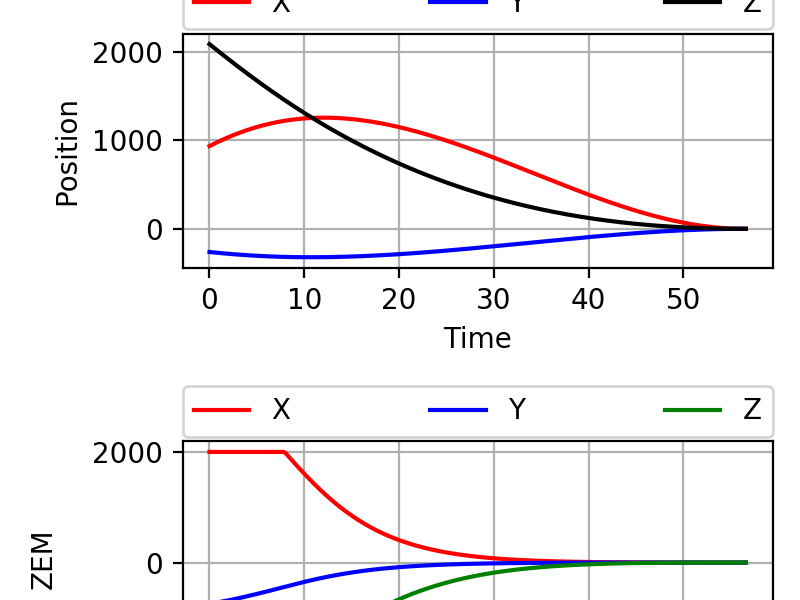

In [24]:
import env_utils as envu
npos = np.linalg.norm(pos,axis=1)
wc = np.argmax(npos)
envu.render_traj(traj[wc])

In [10]:
np.random.uniform(low=3,high=3)

3.0

Landing_icgen:
    downrange                   :  (1500, 1500, -70, -70)
    crossrange                  :  (-500, -500, -30, -30)
    altitude                    :  (2100, 2100, -90, -90)


<IPython.core.display.Javascript object>


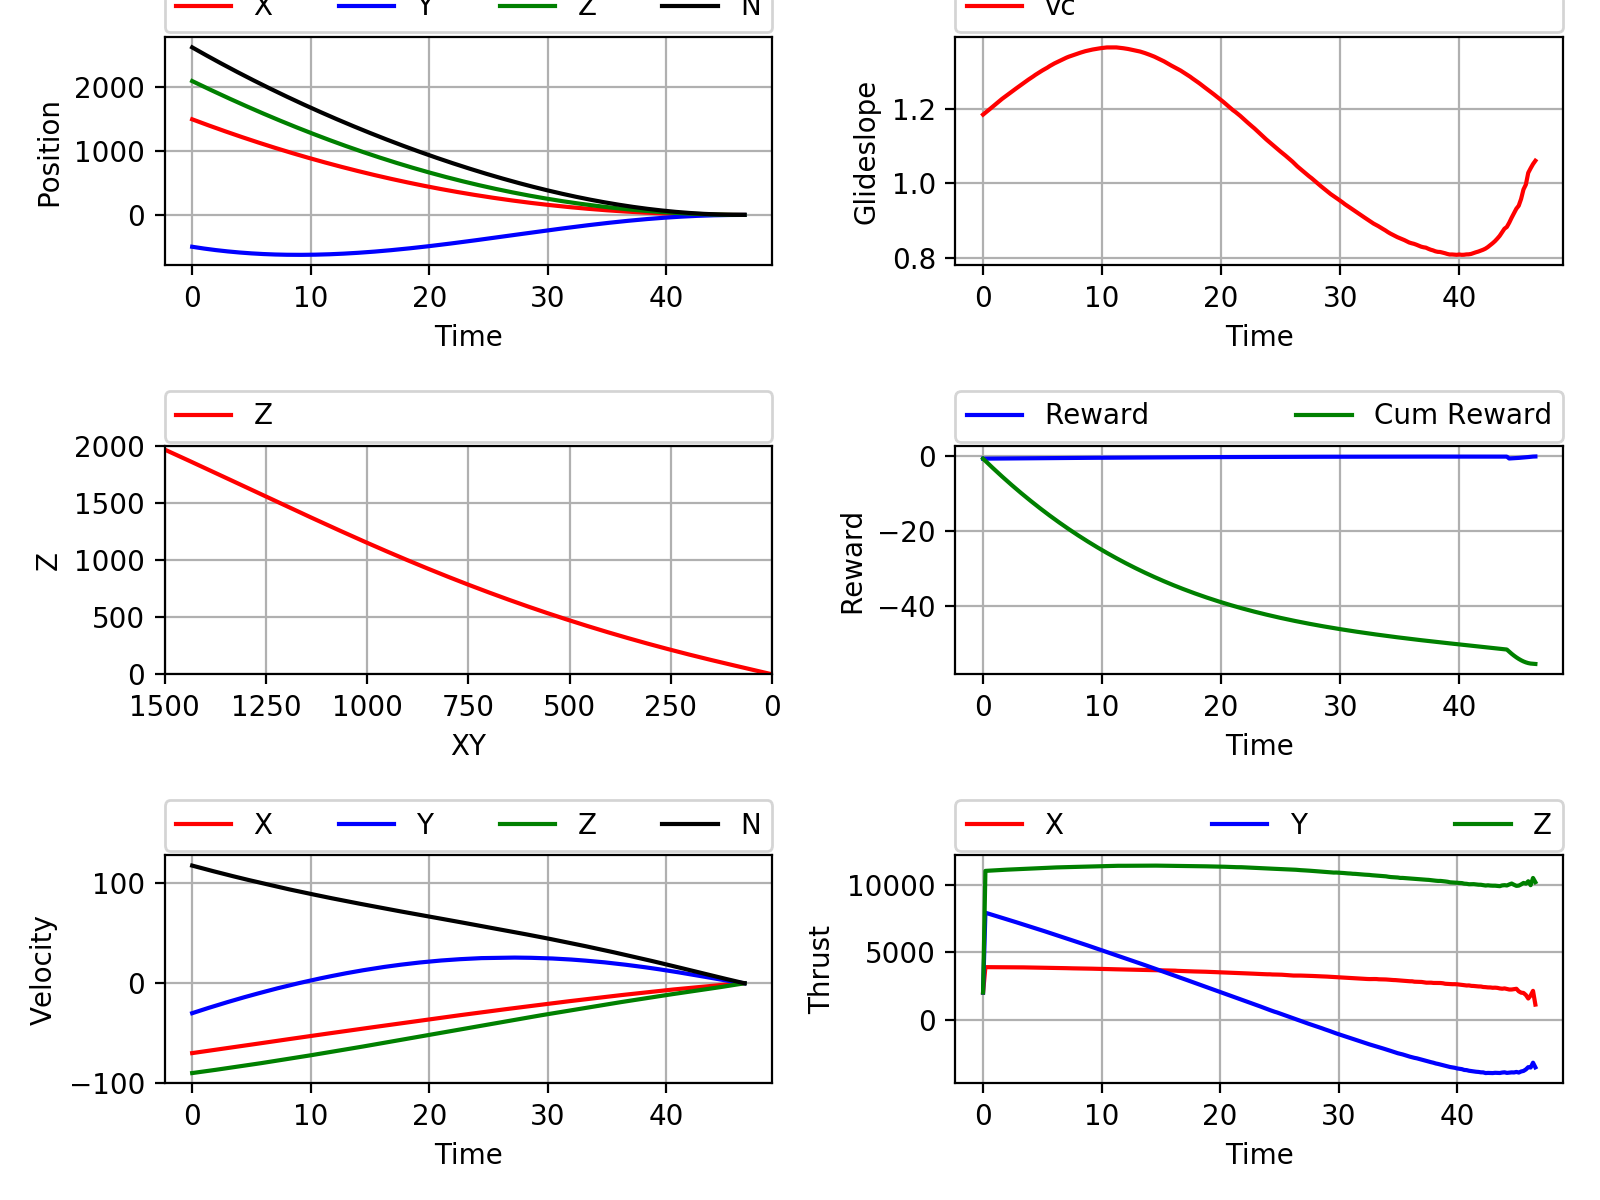

233 0.006176921753766272 0.08812700162431006


In [6]:
env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.05,0.05),noise_u=50,noise_sd=200,
                          downrange = (1500,1500 , -70, -70), 
                           crossrange = (-500,-500 , -30,-30),  
                           altitude = (2100,2100,-90,-90))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()

<IPython.core.display.Javascript object>


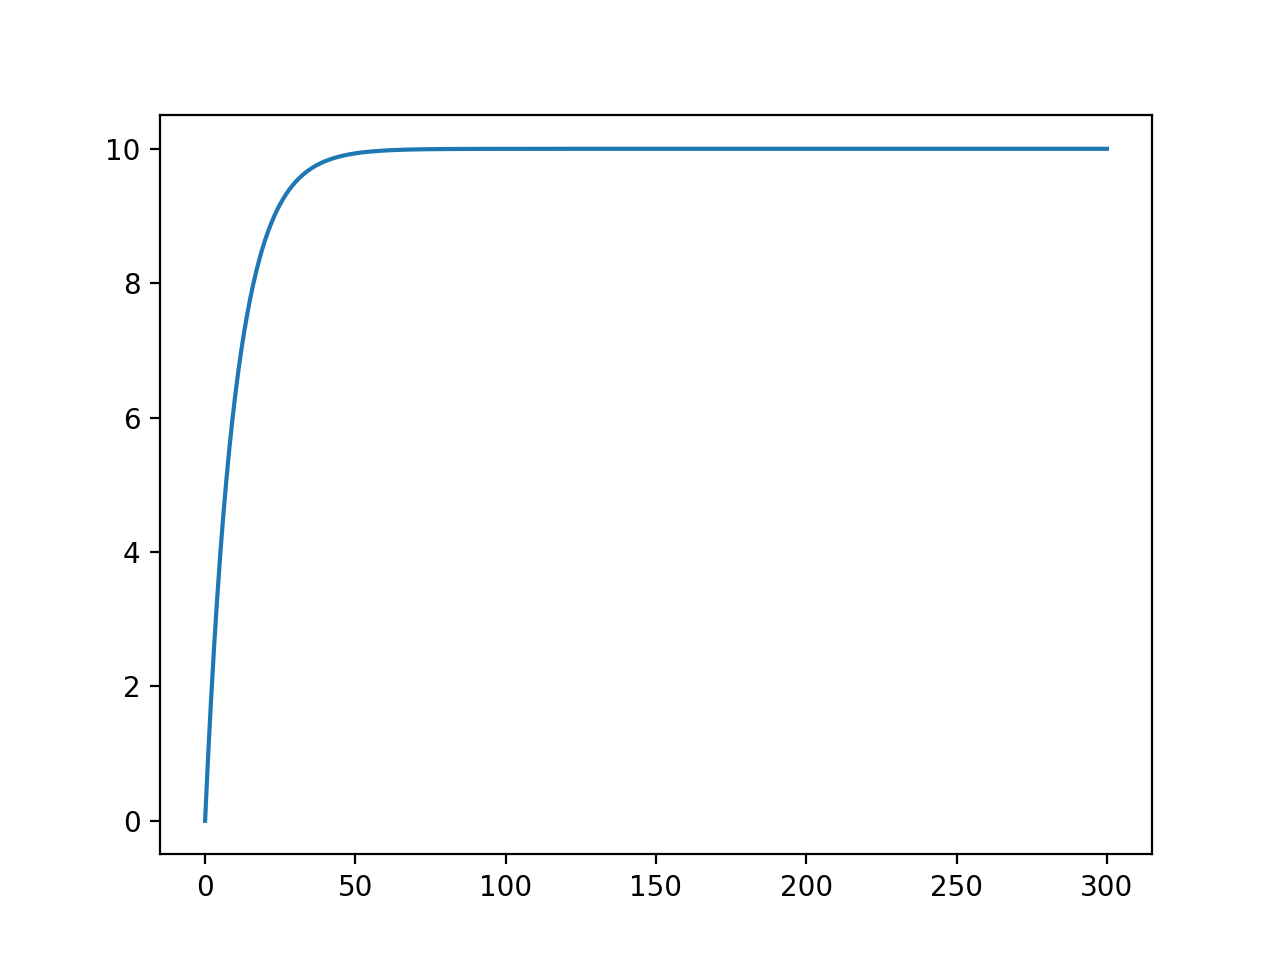

In [32]:
import matplotlib.pyplot as plt
xy = np.linspace(0,300,300)
tau = 10
atarg = 10*(1-np.exp(-xy/tau))
plt.figure()
plt.plot(xy,atarg)
plt.show()